In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data = pd.read_csv('mushroom.csv',header='infer')
df = pd.DataFrame(data)
data.columns=['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season','poisonous']
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,poisonous
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


<h1>Data Exploration</h1>
<h2>1.Summary Statistics</h2>

In [4]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

In [5]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
poisonous            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
cap-diameter       54035 non-null int64
cap-shape          54035 non-null int64
gill-attachment    54035 non-null int64
gill-color         54035 non-null int64
stem-height        54035 non-null float64
stem-width         54035 non-null int64
stem-color         54035 non-null int64
season             54035 non-null float64
poisonous          54035 non-null int64
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

cap-diameter:
	 Mean = 567.26
	 Standard deviation = 359.88
	 Minimum = 0.00
	 Maximum = 1891.00
cap-shape:
	 Mean = 4.00
	 Standard deviation = 2.16
	 Minimum = 0.00
	 Maximum = 6.00
gill-attachment:
	 Mean = 2.14
	 Standard deviation = 2.23
	 Minimum = 0.00
	 Maximum = 6.00
gill-color:
	 Mean = 7.33
	 Standard deviation = 3.20
	 Minimum = 0.00
	 Maximum = 11.00
stem-height:
	 Mean = 0.76
	 Standard deviation = 0.65
	 Minimum = 0.00
	 Maximum = 3.84
stem-width:
	 Mean = 1051.08
	 Standard deviation = 782.06
	 Minimum = 0.00
	 Maximum = 3569.00
stem-color:
	 Mean = 8.42
	 Standard deviation = 3.26
	 Minimum = 0.00
	 Maximum = 12.00
season:
	 Mean = 0.95
	 Standard deviation = 0.31
	 Minimum = 0.03
	 Maximum = 1.80
poisonous:
	 Mean = 0.55
	 Standard deviation = 0.50
	 Minimum = 0.00
	 Maximum = 1.00


In [8]:
data['poisonous'].value_counts()

1    29675
0    24360
Name: poisonous, dtype: int64

In [9]:
data.describe(include='all')

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,poisonous
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [10]:
print('Covariance:')
data.cov()

Covariance:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,poisonous
cap-diameter,129516.323081,158.625044,160.809485,214.654986,31.779700,233172.092943,143.055276,12.464316,-29.667811
cap-shape,158.625044,4.667783,0.207380,0.908435,-0.014617,375.933535,0.204628,0.036605,-0.143342
gill-attachment,160.809485,0.207380,4.967642,0.715248,-0.109229,427.573157,0.145944,-0.027459,-0.058269
gill-color,214.654986,0.908435,0.715248,10.241701,0.031367,276.014814,1.942692,0.058644,-0.101828
stem-height,31.779700,-0.014617,-0.109229,0.031367,0.423760,49.939605,0.005572,-0.000058,0.059390
stem-width,233172.092943,375.933535,427.573157,276.014814,49.939605,611611.705997,401.532877,9.722024,-71.155820
stem-color,143.055276,0.204628,0.145944,1.942692,0.005572,401.532877,10.641151,0.010716,-0.208313
season,12.464316,0.036605,-0.027459,0.058644,-0.000058,9.722024,0.010716,0.093387,-0.012608
poisonous,-29.667811,-0.143342,-0.058269,-0.101828,0.059390,-71.155820,-0.208313,-0.012608,0.247586


In [11]:
print('Correlation:')
data.corr()

Correlation:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,poisonous
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
poisonous,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


<h2>2.Data Visualization</h2>

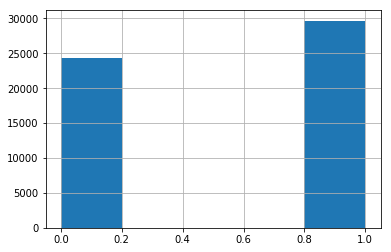

In [12]:
%matplotlib inline

data['poisonous'].hist(bins=5)

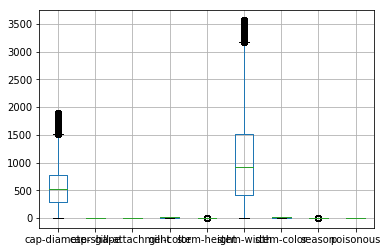

In [13]:
data.boxplot()

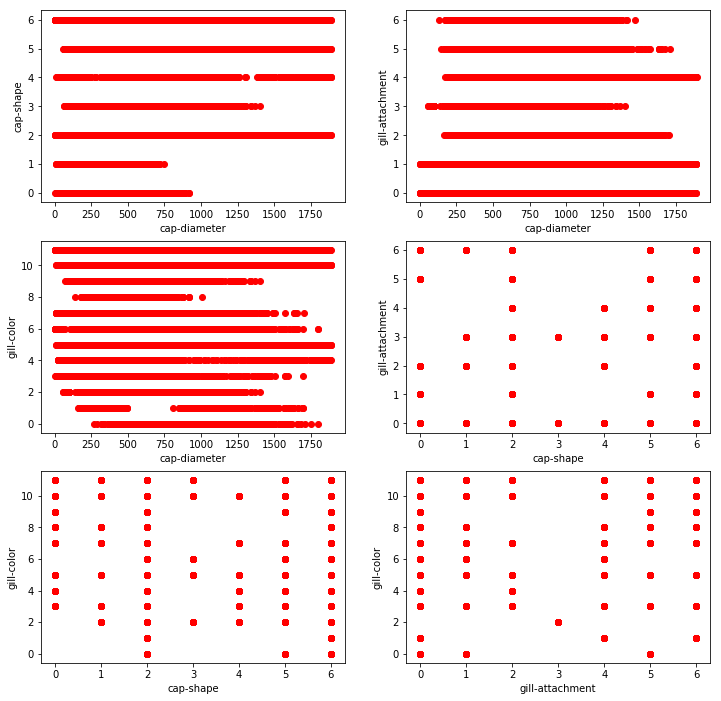

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

<h1>data preprocessing</h1>
<h3>1.Missing values</h3>

In [15]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 54035
Number of attributes = 9
Number of missing values:
	cap-diameter: 0
	cap-shape: 0
	gill-attachment: 0
	gill-color: 0
	stem-height: 0
	stem-width: 0
	stem-color: 0
	season: 0
	poisonous: 0


<h3>there is no missing values</h3>

<h3>2.Outliers</h3>

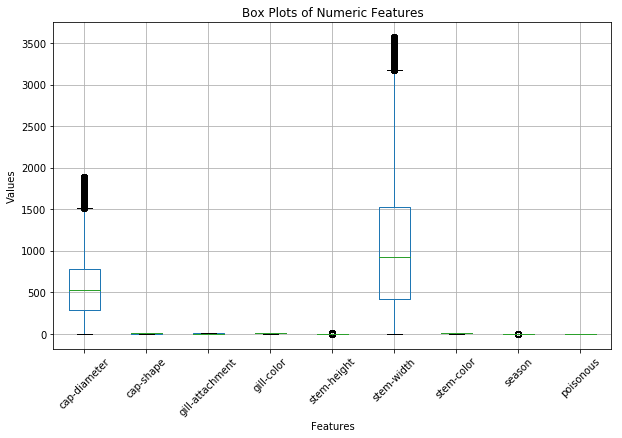

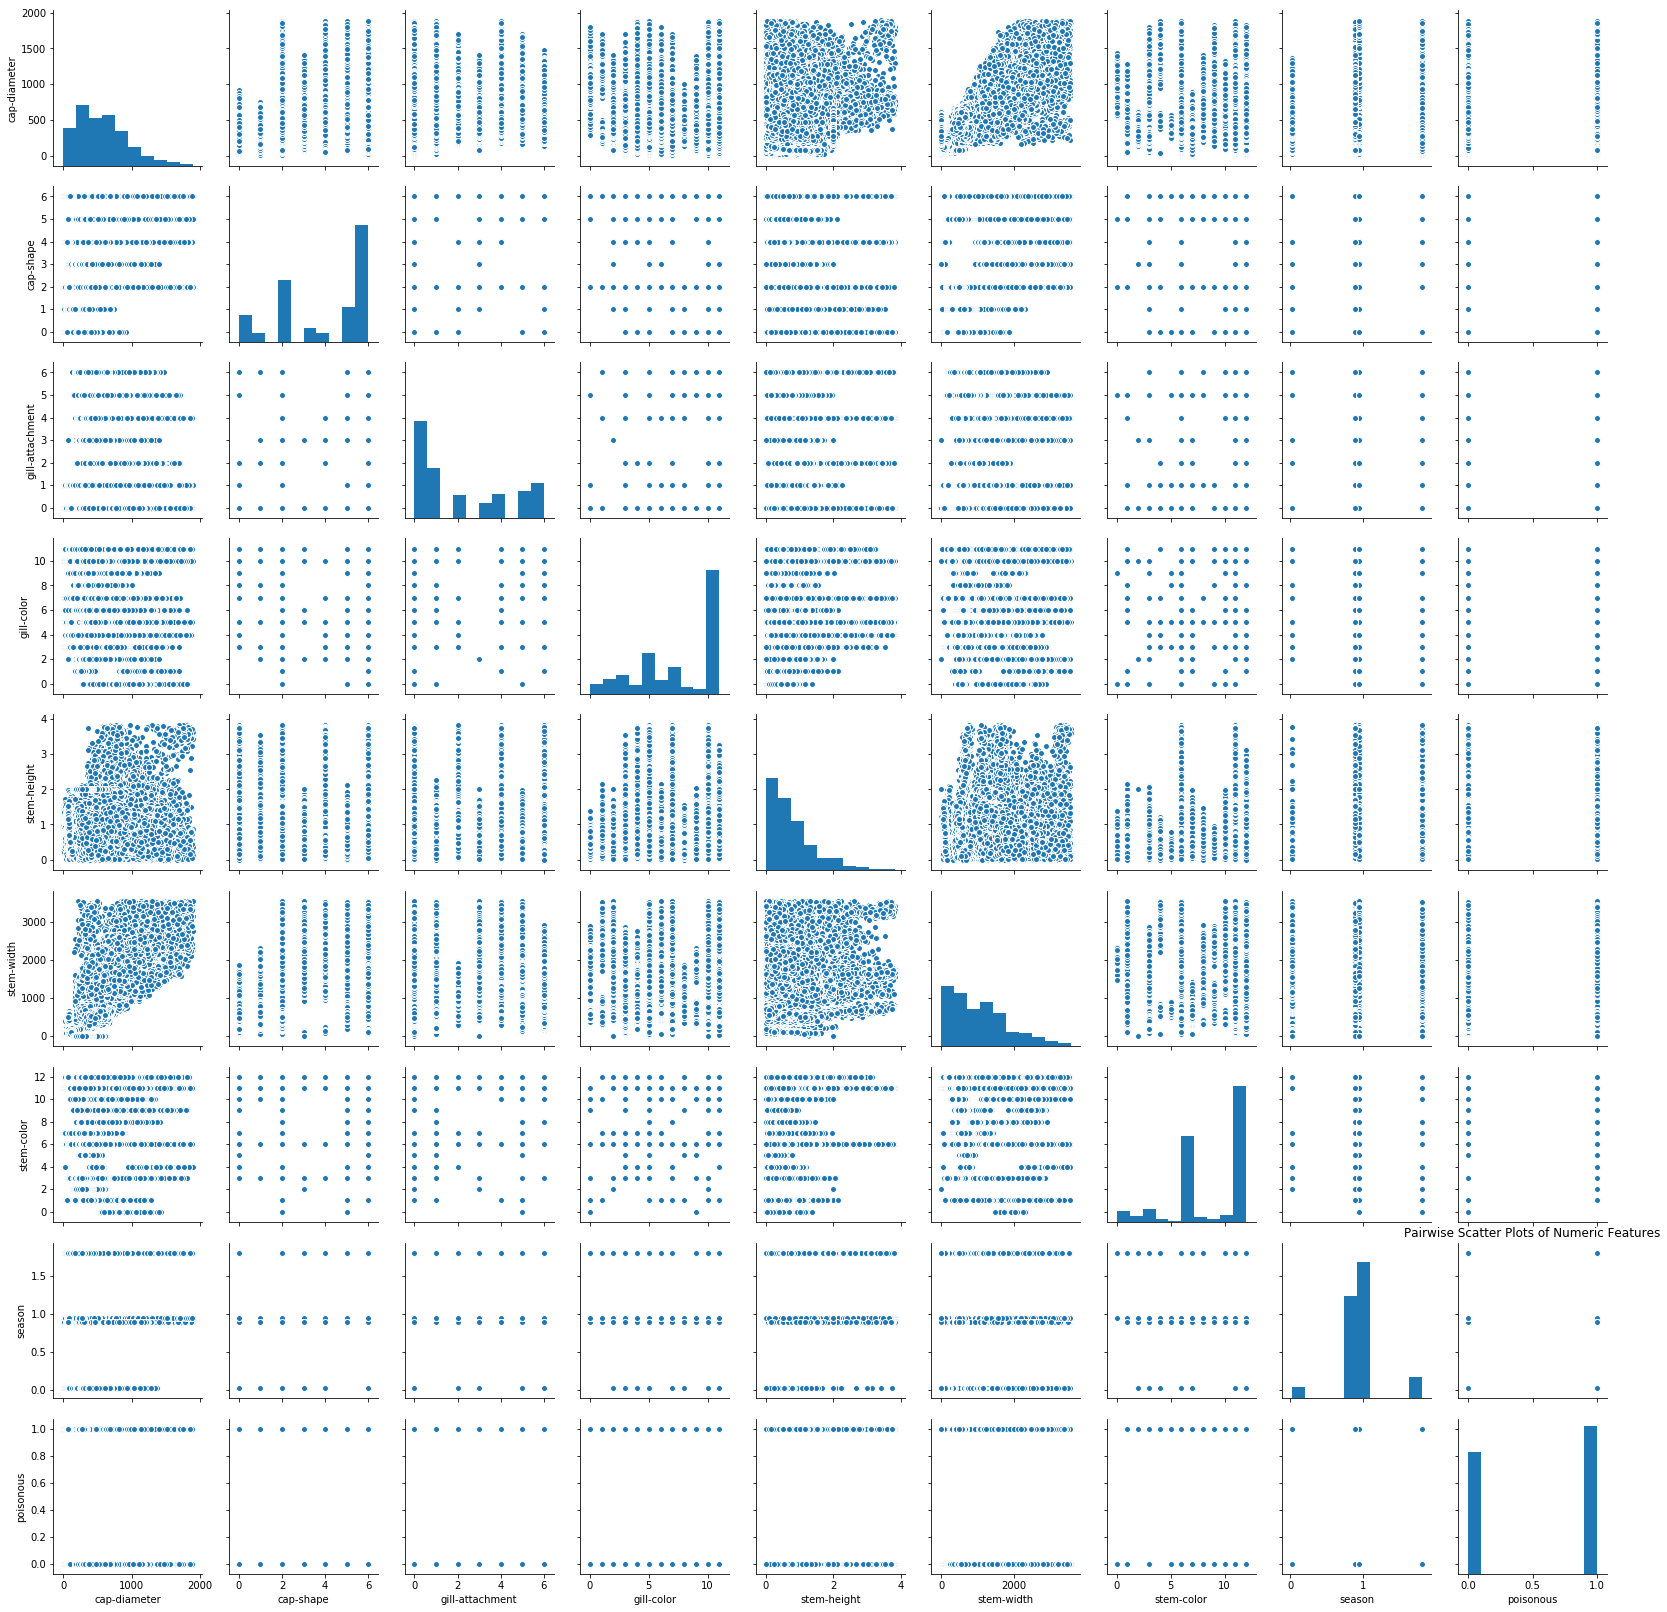

In [16]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Select the numerical columns (assuming they are already preprocessed as numeric)
numeric_columns = ['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season','poisonous']  # Replace with the actual column names

plt.figure(figsize=(10, 6))
data[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Plot scatter plots to visualize relationships between pairs of numeric features
sns.pairplot(data=data, vars=numeric_columns)
plt.title('Pairwise Scatter Plots of Numeric Features')
plt.show()


In [17]:
# Calculate z-scores for each numeric column
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Define a threshold for outlier detection
threshold = 3

# Identify outliers based on the z-scores exceeding the threshold
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
mushroom_data_cleaned = data.drop(data.index[outlier_indices[0]])

# Print the number of removed outliers
print("Number of outliers removed:", len(outlier_indices[0]))

Number of outliers removed: 3827


In [18]:
#put the new cleaned data in "data"
data = mushroom_data_cleaned

<h3>3.Duplicates</h3>

In [19]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 250


In [20]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 50397
Number of rows after discarding duplicates = 50147


In [21]:
#put the new cleaned data in "data"
data = data2

<h5>we think that this data set doesnt need Aggregation , Discretization or Principal Component Analysis</h5>

<h1>Classification</h1>
<h2>*data spliting*</h2>

In [22]:
from sklearn.model_selection import train_test_split

X = data[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']]
Y = data['poisonous'] 



# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
#applying Pandas cross-tabulation to examine the relationship between the attributes with respect to "poisonous" class.
pd.crosstab([data['cap-diameter'],data['cap-shape'], data['gill-attachment'],data['gill-color'],data['stem-height'],data['stem-width'],data['stem-color'],data['season']],data['poisonous'])

poisonous                                                                                     0  \
cap-diameter cap-shape gill-attachment gill-color stem-height stem-width stem-color season        
0            6         0               11         1.019047    21         12         0.943195  0   
1            2         1               6          0.895698    42         7          0.943195  0   
             6         0               11         1.198101    1          11         0.888450  0   
2            0         0               3          1.452757    174        6          0.943195  0   
             2         1               6          1.058837    31         7          0.943195  0   
             6         1               6          0.752455    40         12         0.943195  0   
3            6         0               11         1.098627    22         11         0.888450  0   
                                                  1.142396    10         12         0.888450  0   
4            6         0               11         1.023026    23         12         0.943195  0   
                       1               6          0.983236    34         7          0.888450  0   
5            2         1               6          0.776329    37         12         0.943195  0   
                                                  0.784287    35         7          0.888450  0   
                                                  0.923551    32         7          0.943195  0   
             6         0               11         1.090669    22         11         0.943195  0   
                                                  1.098627    14         12         0.943195  0   
                                                  1.245849    4          11         0.943195  0   
                       1               6          0.545547    55         7          0.943195  0   
6            2         1               6          0.577379    47         7          0.943195  0   
                                                  0.824076    43         12         0.943195  0   
                                                  0.887740    42         7          0.943195  0   
                                                  0.927530    43         7          0.888450  0   
             6         0               11         1.106585    14         12         0.943195  0   
                       1               6          0.800202    34         12         0.888450  0   
7            6         0               11         1.098627    12         12         0.943195  0   
                                                  1.122501    18         11         0.888450  0   
                       1               6          0.633085    41         7          0.943195  0   
                                                  0.796223    44         12         0.888450  0   
8            2         1               6          0.553505    46         7          0.888450  0   
                                                  0.748476    38         7          0.888450  0   
                                                  0.863866    42         12         0.943195  0   
...                                                                                          ..   
1636         6         4               11         1.603107    3190       12         0.888450  0   
1637         2         0               4          0.039364    2090       11         1.804273  1   
             6         5               7          0.532759    1791       6          0.943195  0   
1638         2         0               11         0.449200    2410       11         1.804273  1   
                       1               10         1.177355    2462       11         1.804273  1   
             5         0               10         1.046048    2554       11         0.943195  1   
                                       11         0.258209    2245       11         0.888450  1   
                                        

<h2>1.Decision Tree Classifier</h2>

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

# Fit the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
# Make predictions
y_predictions = clf.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_predictions)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.3524759056164839


In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

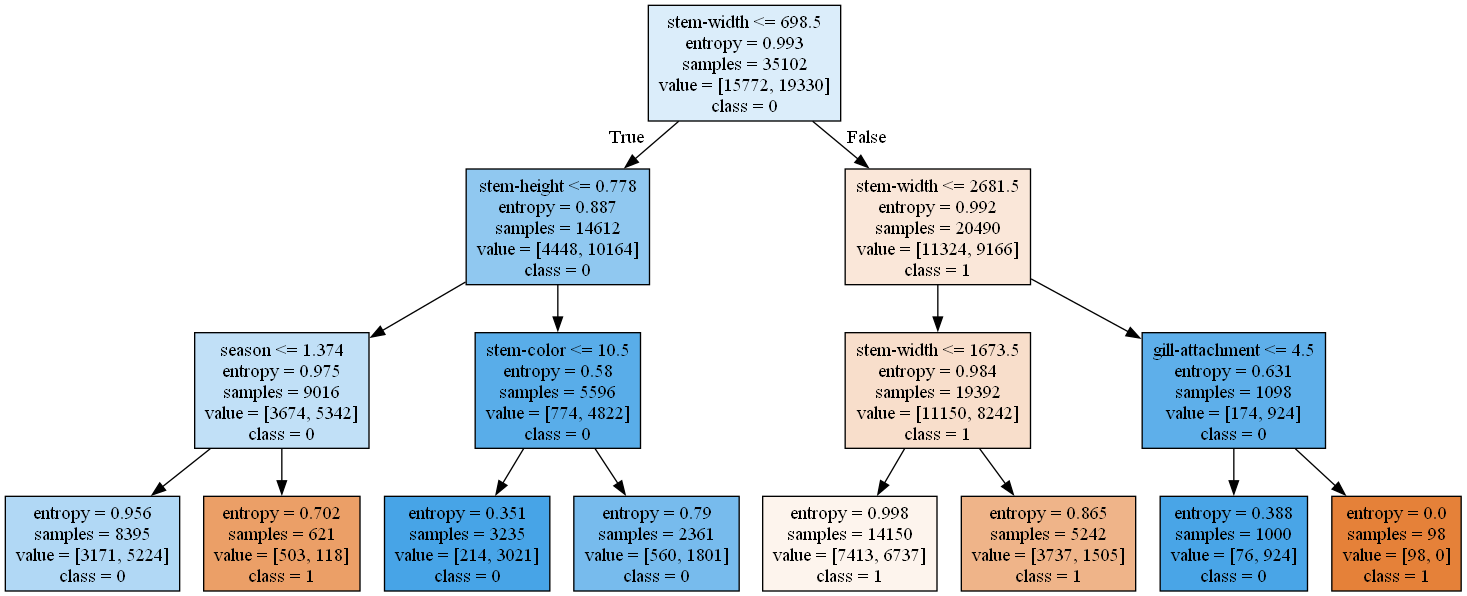

In [28]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','0'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predictions))



Accuracy: 0.6475240943835161
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      6873
           1       0.73      0.56      0.63      8172

    accuracy                           0.65     15045
   macro avg       0.66      0.66      0.65     15045
weighted avg       0.66      0.65      0.65     15045



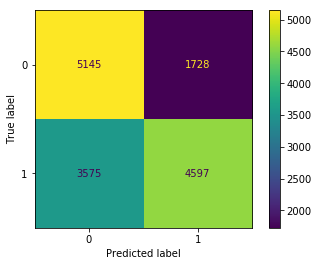

In [30]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_predictions )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Text(0,0.5,'Accuracy')

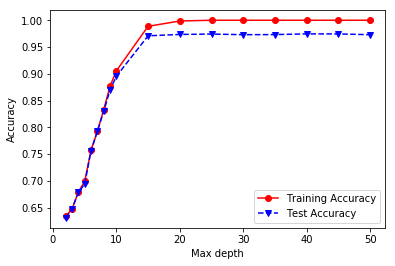

In [31]:
#model overfitting.

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

<h3>Hyperparameter Tuning</h3>

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Decision Tree Classifier model
clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 0.8466600199401795
Mean Squared Error: 0.15333998005982055


<h2>2.Logistic regression</h2>

In [30]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
y_pred = log.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.37673645729478233


In [33]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Text(0,0.5,'Accuracy')

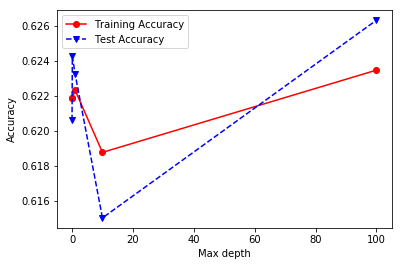

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define a range of complexity (e.g., different values of C)
complexity_values = [0.01, 0.1, 1, 10, 100]

# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train and evaluate models for different levels of complexity
for complexity in complexity_values:
    # Create and train the logistic regression model
    clf = LogisticRegression(C=complexity)
    clf.fit(X_train, y_train)
    
    # Predict labels for training and validation sets
    train_predictions = clf.predict(X_train)
    val_predictions = clf.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the graph
plt.plot(complexity_values,train_accuracies,'ro-',complexity_values,val_accuracies,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

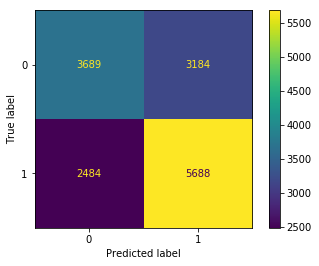

In [35]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [36]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      6873
           1       0.64      0.70      0.67      8172

    accuracy                           0.62     15045
   macro avg       0.62      0.62      0.62     15045
weighted avg       0.62      0.62      0.62     15045



0.6232635427052177

<h3>Hyperparameter Tuning</h3>

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'sag'],
    'max_iter': [100, 200, 300]
}


log = LogisticRegression()
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid object to the training data
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_log = grid_search.best_estimator_
y_pred = best_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The scor

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HP_User\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the 

Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Accuracy: 0.6493851777999335


<h2>3.Random forest</h2>

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

In [39]:
rf = RandomForestClassifier()

grid = GridSearchCV(estimator= rf, param_grid=param_grid, cv=5, verbose = 1, scoring = 'accuracy', n_jobs= -1)

In [40]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [41]:
y_predic = grid.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_predic)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.011166500498504487


Text(0,0.5,'Accuracy')

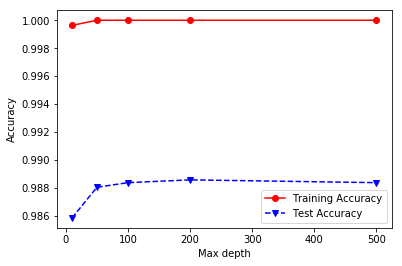

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Define a range of complexity (e.g., different values of n_estimators or max_depth)
complexity_values = [10, 50, 100, 200, 500]

# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train and evaluate models for different levels of complexity
for complexity in complexity_values:
    # Create and train the random forest model
    model = RandomForestClassifier(n_estimators=complexity)
    model.fit(X_train, y_train)
    
    # Predict labels for training and validation sets
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the graph
plt.plot(complexity_values,train_accuracies ,'ro-',complexity_values,val_accuracies,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [44]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [50, 100, 200],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'bootstrap': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring

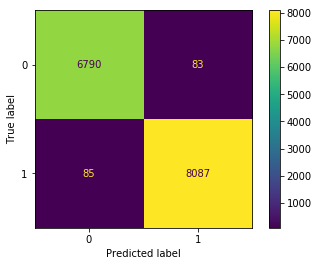

In [45]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_predic )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [46]:
print(classification_report(y_test, y_predic))
accuracy_score(y_test, y_predic)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6873
           1       0.99      0.99      0.99      8172

    accuracy                           0.99     15045
   macro avg       0.99      0.99      0.99     15045
weighted avg       0.99      0.99      0.99     15045



0.9888334995014955

<h3>Hyperparameter Tuning</h3>

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

# Create the Random Forest Classifier and the GridSearchCV object
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object
grid.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid.best_params_
print("Best hyperparameters:", best_params)

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.9883017613825191


<h2>4.Bagging</h2>

In [60]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10


clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)


In [61]:
mse = mean_squared_error(y_test, Y_predTest)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.05004985044865404


In [62]:
clf.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=10),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Text(0,0.5,'Accuracy')

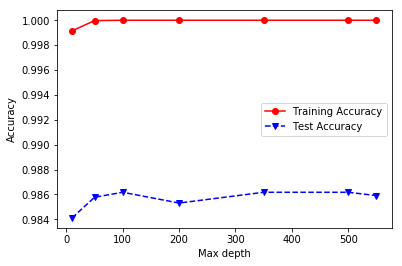

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a range of complexity (e.g., different values of n_estimators)
complexity_values = [10, 50, 100, 200,350,500,550 ]

# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train and evaluate ensembles for different levels of complexity
for complexity in complexity_values:
    # Create and train the bagging ensemble
    base_estimator = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=complexity)
    model.fit(X_train, y_train)
    
    # Predict labels for training and validation sets
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the graph
plt.plot(complexity_values,train_accuracies,'ro-',complexity_values,val_accuracies,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [51]:
print(accuracy_score(y_test, Y_predTest))

0.9504818876703224


In [52]:
print(classification_report(y_test, Y_predTest))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6873
           1       0.97      0.94      0.95      8172

    accuracy                           0.95     15045
   macro avg       0.95      0.95      0.95     15045
weighted avg       0.95      0.95      0.95     15045



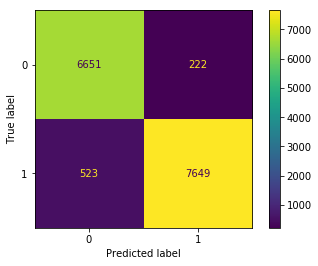

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_predTest)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

<h3>Hyperparameter Tuning</h3>

In [122]:


from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'base_estimator__max_depth': [5, 10, 15,20,25,30],
    'n_estimators': [100, 200, 350,400, 500,600],
    'bootstrap': [True, False]
}

# Create the Bagging Classifier and the GridSearchCV object
clf = ensemble.BaggingClassifier(DecisionTreeClassifier())
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object
grid.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid.best_params_
print("Best hyperparameters:", best_params)

best_clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=best_params['base_estimator__max_depth']), n_estimators=best_params['n_estimators'], bootstrap=best_params['bootstrap'])
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'base_estimator__max_depth': 25, 'bootstrap': True, 'n_estimators': 400}
Test Accuracy: 0.9863742107012297


<h2>5.Boosting</h2>

In [54]:
numBaseClassifiers = 500
maxdepth = 10


clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTestboos = clf.predict(X_test)

In [55]:
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=10),
 'learning_rate': 1.0,
 'n_estimators': 500,
 'random_state': None}

In [56]:
mse = mean_squared_error(y_test, Y_predTestboos)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.012097042206713194


In [57]:
print(accuracy_score(y_test, Y_predTestboos))

0.9879029577932869


In [58]:
print(classification_report(y_test,Y_predTestboos))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6873
           1       0.99      0.99      0.99      8172

    accuracy                           0.99     15045
   macro avg       0.99      0.99      0.99     15045
weighted avg       0.99      0.99      0.99     15045



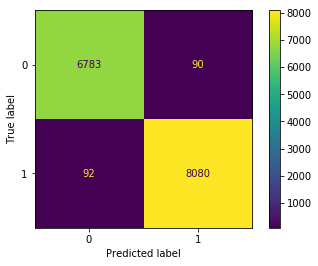

In [59]:
confusion_matrix = metrics.confusion_matrix(y_test,Y_predTestboos)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Text(0,0.5,'Accuracy')

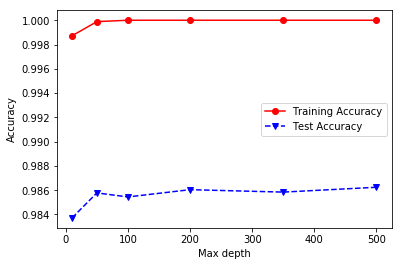

In [95]:
# Define a range of complexity (e.g., different values of n_estimators)
complexity_values = [10, 50, 100, 200,350, 500]

# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train and evaluate ensembles for different levels of complexity
for complexity in complexity_values:
    # Create and train the bagging ensemble
    base_estimator = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=base_estimator, n_estimators=complexity)
    model.fit(X_train, y_train)
    
    # Predict labels for training and validation sets
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the graph
plt.plot(complexity_values,train_accuracies,'ro-',complexity_values,val_accuracies,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

<h3>Hyperparameter Tuning</h3>

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

numBaseClassifiers = 500
maxdepth = 10

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=numBaseClassifiers)

param_grid = {
    'n_estimators': [100, 200, 350,400, 500,600],
    'base_estimator__max_depth': [5, 10, 15,20,25,30],
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0,2.5]
}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Best hyperparameters:", best_params)

best_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_params['base_estimator__max_depth']),
                             n_estimators=best_params['n_estimators'],
                             learning_rate=best_params['learning_rate'])
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'base_estimator__max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 500}
Test Accuracy: 0.9872382851445664
